## 1. *Pytorch* Basic


### 1.1. Pytorch import

In [1]:
import torch

In [2]:
print(torch.__version__)

1.10.0+cu111


### 1.2. Pytorch sneak peek

In [3]:
import numpy as np
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [4]:
#MNIST dataset download
train_data = datasets.MNIST(root = "data", train = True, download = True, transform = ToTensor())
test_data = datasets.MNIST(root = "data", train = False, download = True, transform = ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
#Set batch size
batch_size = 64

#Set dataloader
train_dataloader = DataLoader(train_data, batch_size = batch_size)
test_dataloader = DataLoader(test_data, batch_size = batch_size)

#Confirm
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64])


In [6]:
#Get GPU or CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

Using cuda device


In [7]:
#Set Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [8]:
#Set Loss function, optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3)

In [9]:
len(train_dataloader.dataset)

60000

In [10]:
#Define function for training
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        #Calculate loss
        pred = model(X)
        loss = loss_fn(pred, y)

        #Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}    [{current:>5d}/{size:>5d}]")

#Define function for test
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss = loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
        test_loss /= num_batches
        correct /= size
        print(f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [11]:
#Training
epochs = 10
for t in range(epochs):
    print(f"Epoch {t + 1}\n ----------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
 ----------------------------------
loss: 2.301308    [    0/60000]
loss: 0.450249    [ 6400/60000]
loss: 0.289567    [12800/60000]
loss: 0.415176    [19200/60000]
loss: 0.270250    [25600/60000]
loss: 0.326757    [32000/60000]
loss: 0.159550    [38400/60000]
loss: 0.376421    [44800/60000]
loss: 0.293039    [51200/60000]
loss: 0.293632    [57600/60000]
Test Error: 
 Accuracy: 94.0%, Avg loss: 0.000440 

Epoch 2
 ----------------------------------
loss: 0.150486    [    0/60000]
loss: 0.184127    [ 6400/60000]
loss: 0.114909    [12800/60000]
loss: 0.185431    [19200/60000]
loss: 0.151486    [25600/60000]
loss: 0.255485    [32000/60000]
loss: 0.053693    [38400/60000]
loss: 0.253517    [44800/60000]
loss: 0.196417    [51200/60000]
loss: 0.242623    [57600/60000]
Test Error: 
 Accuracy: 96.0%, Avg loss: 0.000105 

Epoch 3
 ----------------------------------
loss: 0.090530    [    0/60000]
loss: 0.123087    [ 6400/60000]
loss: 0.082788    [12800/60000]
loss: 0.089541    [19200/600

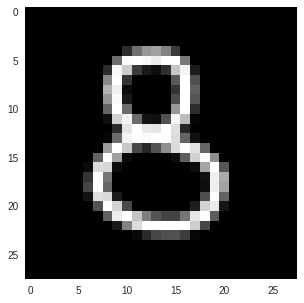

In [12]:
import os
from PIL import Image

#Input new test image

#Set path of image file
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, "image.png")

#Read image file
cur_img = Image.open(img_path)

#Resize
cur_img = cur_img.resize((28, 28))
image = np.asarray(cur_img)

#If image channel is RGB, change it to gray scale
try:
    image = np.mean(image , axis = 2)
except:
    pass

#Change to black background and white character like MNIST data
image = np.abs(255 - image)

#Normalization
image = image.astype(np.float32) / 255.

#Confirm
plt.figure(figsize = (5, 5))
plt.imshow(image, cmap = "gray")
plt.grid(False)
plt.show()

In [13]:
#Predict
image = torch.as_tensor(image).to(device).reshape(1, 1, 28, 28)
model.eval()
predict = model(image)

print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

Model이 예측한 값은 3 입니다.


## 2. Tensor

### 2.1. Tensor

In [14]:
#list to tensor
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


In [15]:
#np.array to tensor
np_array = np.array(data)
x_np_1 = torch.tensor(np_array)
x_np_2 = torch.as_tensor(np_array)
x_np_3 = torch.from_numpy(np_array)

print(x_np_1)
print(x_np_2)
print(x_np_3, "\n")

x_np_1[0, 0] = 5
x_np_2[0, 0] = 6
x_np_3[0, 0] = 7

print(x_np_1.numpy() == np_array, "\n") #torch.tensor는 tensor로 변환할 때 새 메모리를 할당함.
print(x_np_2.numpy() == np_array, "\n") #torch.from_numpy(), torch.as_tensor는 tensor로
print(x_np_3.numpy() == np_array, "\n") #                   변환할 때, 원래 메모리를 상속받음.

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]]) 

[[False  True]
 [ True  True]] 

[[ True  True]
 [ True  True]] 

[[ True  True]
 [ True  True]] 



In [16]:
#Ones, zeros, full, empty
a = torch.ones(2, 3)
b = torch.zeros(2, 3)
c = torch.full((2, 3), 2)
d = torch.empty(2, 3)

print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[ 5.4064e+01,  3.0882e-41,  0.0000e+00],
        [ 0.0000e+00, -2.5674e-31,  3.0880e-41]])


In [17]:
#Ones_like, zeros_like, full_like, empty_like
e = torch.ones_like(c)
f = torch.zeros_like(c)
g = torch.full_like((c), 3)
h = torch.empty_like(c)

print(e)
print(f)
print(g)
print(h)

tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[     94653602349056,                  24,          4294967295],
        [8171062582517395298, 8243662592152856949, 7310305785198503009]])


In [18]:
#Eye, arange
i = torch.eye(3)
j = torch.arange(10)

print(i)
print(j)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [19]:
#rand, randn
k = torch.rand(2, 2) #rand: generate samples from uniform distribution (range [0, 1))
l = torch.randn(2, 2) #randn: generate samples from the normal distribution

print(k)
print(l)

tensor([[0.9238, 0.1878],
        [0.5765, 0.2869]])
tensor([[ 1.3424, -1.7198],
        [ 1.4698,  0.3253]])


### 2.2. Attributes of tensor

In [20]:
#Shape, Type, device
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}") #default: cpu

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [21]:
#Change attributes
tensor = tensor.reshape(4, 3)   #Shape: .reshape() or .view()
tensor = tensor.int()           #Dtype: .int() or .float()
if torch.cuda.is_available():   
    tensor = tensor.to("cuda")  #device: .to("cuda")

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored on: cuda:0


### 2.3. Indexing & Slicing

In [22]:
a = torch.arange(1, 13).reshape(3, 4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


In [23]:
#Indexing: Reduce the dimension
print(a[1])
print(a[0, -1])

tensor([5, 6, 7, 8])
tensor(4)


In [24]:
#Slicing: Maintain the dimension
print(a[1 : 2])
print(a[:2, 2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### 2.4. Transpose

In [25]:
a = torch.arange(16).reshape(2, 2, 4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


In [26]:
b = a.transpose(1, 2) #swap axis
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


In [27]:
c = a.permute((2, 0, 1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### 2.5. Calculation of Tensor

In [28]:
x = torch.tensor(([1, 2], [3, 4]), dtype = torch.float32)
y = torch.tensor(([5, 6], [7, 8]), dtype = torch.float32)
print(x)
print(y)
print()
print(x + y == torch.add(x, y))
print(x - y == torch.subtract(x, y))
print(x * y == torch.multiply(x, y))
print(x / y == torch.divide(x, y))
print(x @ y == torch.matmul(x, y))

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])

tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


In [29]:
z = torch.arange(1, 11).reshape(2, 5)

sum_01 = torch.sum(z, axis = 0)
sum_02 = torch.sum(z, axis = 1)
sum_03 = torch.sum(z, axis = -1)

print(z)
print()
print(sum_01, sum_01.shape)
print(sum_02, sum_02.shape)
print(sum_03, sum_03.shape)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


In [30]:
a = torch.arange(24).reshape(4, 6)
b = a.clone().detach()

c = torch.cat([a, b], axis = 0)
d = torch.cat([a, b], axis = 1)

e = torch.stack([a, b], axis = 0)
f = torch.stack([a, b], axis = 1)
g = torch.stack([a, b], axis = -1)

print(a)
print(b)
print("-" * 50)
print(c, c.shape, "\n")
print(d, d.shape, "\n")
print("-" * 50)
print(e, e.shape, "\n")
print(f, f.shape, "\n")
print(g, g.shape, "\n")

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])
--------------------------------------------------
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6]) 

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12]) 

--------------------------------------------------
tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
     